In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
train = pd.read_csv('data/open/train.csv')
test = pd.read_csv('data/open/test.csv')
display(train.head(2))
display(test.head(2))

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0


,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0


## 데이터 확인해보기

In [3]:
train.shape, test.shape

((30200, 14), (12943, 13))

In [4]:
set(train.columns) - set(test.columns)

{'전화해지여부'}

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
train.isnull().sum()
# 결측치 없음

ID         0
가입일        0
음성사서함이용    0
주간통화시간     0
주간통화횟수     0
주간통화요금     0
저녁통화시간     0
저녁통화횟수     0
저녁통화요금     0
밤통화시간      0
밤통화횟수      0
밤통화요금      0
상담전화건수     0
전화해지여부     0
dtype: int64

In [8]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


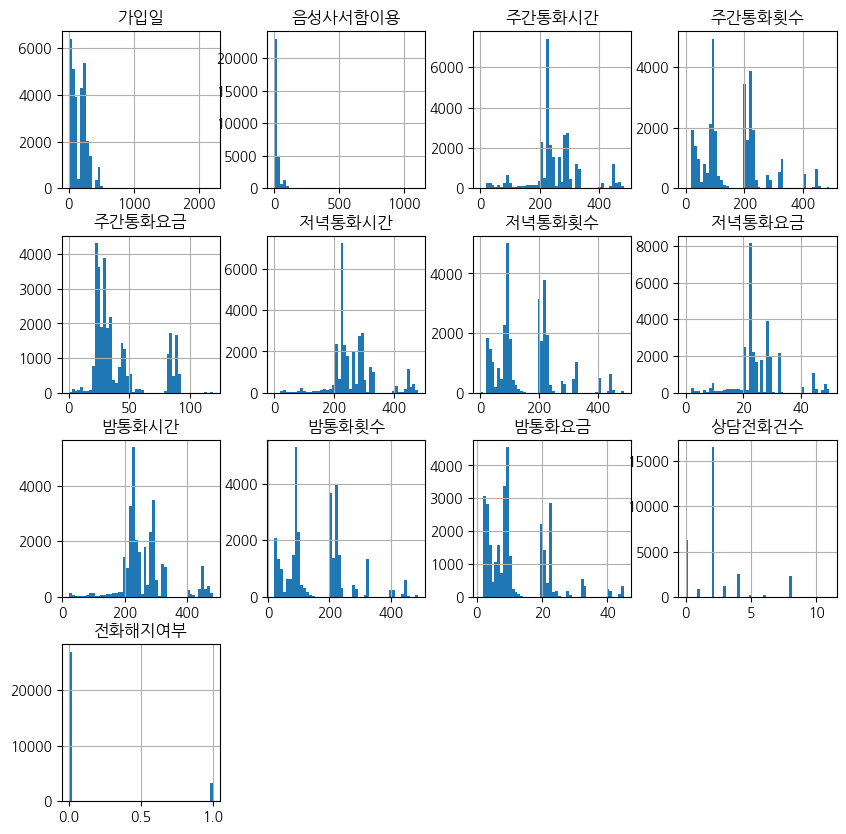

In [9]:
train.hist(bins = 50, figsize = (10,10));

In [10]:
train['전화해지여부'].value_counts(1)

0    0.890132
1    0.109868
Name: 전화해지여부, dtype: float64

## 이상치 확인

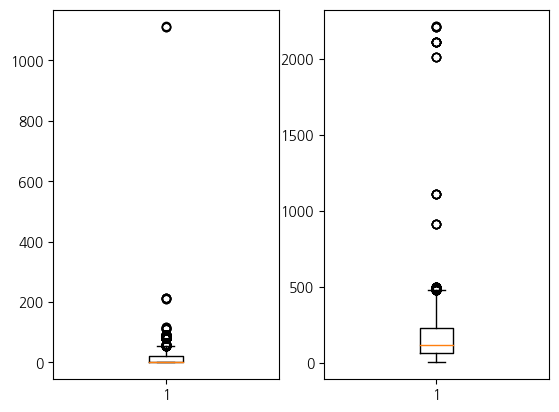

In [11]:
fig = plt.figure()
fig.add_subplot(121)
plt.boxplot(x = train['음성사서함이용'])
fig.add_subplot(122)
plt.boxplot(x = train['가입일']);

In [12]:
# 이상치를 제거한 것이 좋을지 확인해보기 위해서 따로 프레임을 생성
train_75 = train[train['음성사서함이용'] <= train['음성사서함이용'].describe()['75%']].copy()
train_75 = train[train['가입일'] <= train['가입일'].describe()['75%']].copy()

train_75

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
5,TRAIN_00005,82,32,89.5,83,28.9,289.6,29,32.28,270.7,323,2.26,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30191,TRAIN_30191,23,0,63.7,93,20.6,223.2,33,23.33,234.3,203,6.22,2,0
30192,TRAIN_30192,224,0,245.8,202,24.7,245.3,223,24.42,23.3,25,2.24,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [13]:
train.drop(columns="전화해지여부").select_dtypes(exclude="O").agg(["skew", "kurt"]).T.describe()

,skew,kurt
count,12.000000,12.000000
mean,1.832316,35.870186
std,2.722244,108.398671
min,0.177856,0.024647
25%,0.767607,0.308614
50%,0.804765,1.757650
75%,1.345786,2.167431
max,10.159494,378.258369


# EDA

In [14]:
# 해지여부에 따른 고객들 데이터 생성
cols_ox = train.columns.drop(['ID','전화해지여부'])
df_ox_median = train.groupby('전화해지여부')[cols_ox].agg('median').reset_index()
df_ox_median

,전화해지여부,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,0,116.0,1.0,233.60,115.0,31.2,242.95,112.0,23.30,242.7,107.0,9.02,2.0
1,1,135.0,1.0,250.25,143.0,29.8,244.10,111.0,23.32,244.3,110.0,9.23,2.0


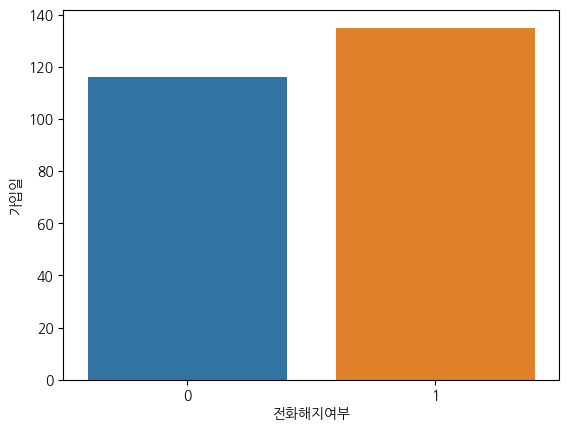

In [15]:
sns.barplot(data = df_ox_median, x = '전화해지여부', y = '가입일');

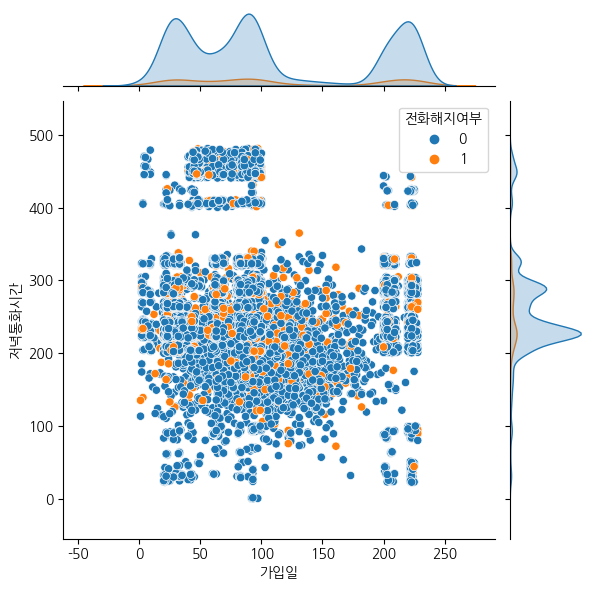

In [16]:
sns.jointplot(data=train_75, x="가입일", y="저녁통화시간", hue="전화해지여부");

# 분류
## 기본train dataset
### 학습, 예측 데이터셋 만들기

In [17]:
label_name = '전화해지여부'
label_name

'전화해지여부'

In [18]:
X_train = train.drop(columns=[label_name,'ID'])
y_train = train[label_name]

X_train.shape, y_train.shape

((30200, 12), (30200,))

In [19]:
X_test = test.drop(columns = 'ID')
print(X_test.shape)
X_test.head(2)

(12943, 12)


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0


---
# 학습 모델 만들기
## ExtraTreeClassifier 

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

model_etc = ExtraTreesClassifier(random_state=42,n_estimators = 200,)
model_etc

ExtraTreesClassifier(n_estimators=200, random_state=42)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.2s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.3s finished


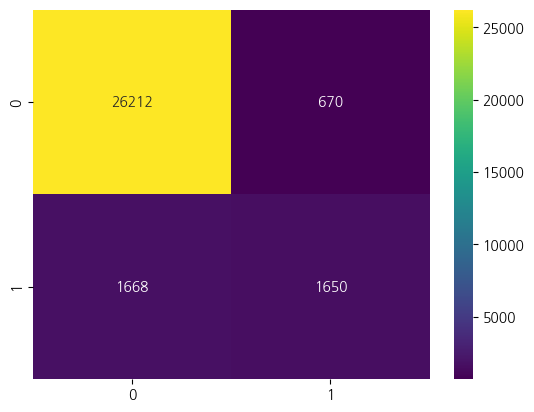

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_valid_predict_etc = cross_val_predict(model_etc, X_train, y_train, cv=5, n_jobs= -1, verbose=2)
cm = confusion_matrix(y_train,y_valid_predict_etc)
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.0f');

In [22]:
print(classification_report(y_train,y_valid_predict_etc))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26882
           1       0.71      0.50      0.59      3318

    accuracy                           0.92     30200
   macro avg       0.83      0.74      0.77     30200
weighted avg       0.92      0.92      0.92     30200



In [23]:
from sklearn.metrics import f1_score
f1=f1_score(y_train, y_valid_predict_etc)
f1

0.5853139411138701

In [24]:
model_etc.fit(X_train, y_train)
y_predict = model_etc.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
def submit_csv(y_predict,f1):
    submission = pd.read_csv('data/open/sample_submission.csv', index_col="ID")
    submission["전화해지여부"] = y_predict
    file_name = f'data/open/submit_{f1}.csv'
    submission.to_csv(file_name)
    return pd.read_csv(file_name)

In [27]:
submit_csv(y_predict,f1)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


결과 : 0.7932305376 (데이콘제출)

In [28]:
parameter = {
    'n_estimators' : [100,200,300,500,700,800,1000,1500],
    'max_depth' : [None, 3,4,5,6,7,8,9,10]
}

In [29]:
from sklearn.model_selection import GridSearchCV

clf = ExtraTreesClassifier(random_state= 42)
clf = GridSearchCV(clf, parameter, cv=3, n_jobs= -1)
clf.fit(X_train, y_train)

/Users/jiwon/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 500, 700, 800, 1000,
                                          1500]})

In [30]:
clf.best_params_, clf.best_score_

({'max_depth': None, 'n_estimators': 200}, 0.9198013188450416)

In [31]:
y_valid_predict = cross_val_predict(clf.best_estimator_, X_train, y_train, cv=30, n_jobs = -1, verbose = 2)
print(classification_report(y_train,y_valid_predict_etc))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/jiwon/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26882
           1       0.71      0.50      0.59      3318

    accuracy                           0.92     30200
   macro avg       0.83      0.74      0.77     30200
weighted avg       0.92      0.92      0.92     30200



[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.6s finished


In [32]:
f1=f1_score(y_train, y_valid_predict)
f1


0.6202640150865764

In [33]:
clf.best_estimator_.fit(X_train, y_train)
y_predict = clf.best_estimator_.predict(X_test)
y_predict

KeyboardInterrupt: 

In [ ]:
submit_csv(y_predict,f1)

데이콘 결과 : 0.7381687687

In [ ]:
# 피처 중요도 확인해보기
model_etc.fit(X_train, y_train)
fi = pd.Series(model_etc.feature_importances_)
fi.index = model_etc.feature_names_in_
fi.sort_values().plot.barh()

In [ ]:
fi_cols = fi.sort_values(ascending = 0)[:5].index
X_train_fi = X_train[fi_cols].copy()
X_test_fi = X_test[fi_cols].copy()
X_train_fi.shape, X_test_fi.shape, y_train.shape

In [ ]:
y_valid_predict = cross_val_predict(clf.best_estimator_, X_train_fi, y_train, cv=5, n_jobs = -1, verbose = 2)
f1=f1_score(y_train, y_valid_predict)
f1

In [ ]:
model_etc.fit(X_train_fi, y_train)
y_predict = model_etc.predict(X_test_fi)
y_predict

In [ ]:
submit_csv(y_predict,f1)

In [ ]:
model_etc = ExtraTreesClassifier(random_state=182,n_estimators = 200,)
model_etc

---
## SGDClassifier

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf

SGDClassifier(random_state=42)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s


0.12370833939746761


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.6s finished


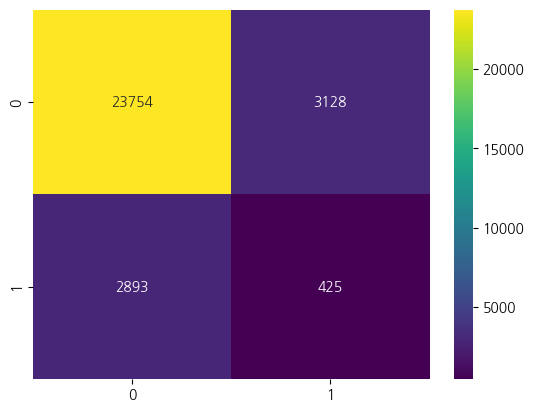

In [41]:
y_valid_predict_etc = cross_val_predict(sgd_clf, X_train, y_train, cv=100, n_jobs= -1, verbose=2)
cm = confusion_matrix(y_train,y_valid_predict_etc)
f1=f1_score(y_train,y_valid_predict_etc)
print(f1)
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.0f');

In [42]:
print(classification_report(y_train,y_valid_predict_etc))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     26882
           1       0.12      0.13      0.12      3318

    accuracy                           0.80     30200
   macro avg       0.51      0.51      0.51     30200
weighted avg       0.81      0.80      0.80     30200



In [43]:
sgd_clf.fit(X_train, y_train)
y_predict = sgd_clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
submit_csv(y_predict,f1)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


데이콘 제출 결과 : 0.4709368869

---
## 이상치 제거 데이터 ExtraTreeClassifier

In [45]:
X_train = train_75.drop(columns=[label_name,'ID'])
y_train = train_75[label_name]

X_train.shape, y_train.shape

((22739, 12), (22739,))

In [46]:
model_etc = ExtraTreesClassifier(random_state=42,n_estimators = 200,)
model_etc

ExtraTreesClassifier(n_estimators=200, random_state=42)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished


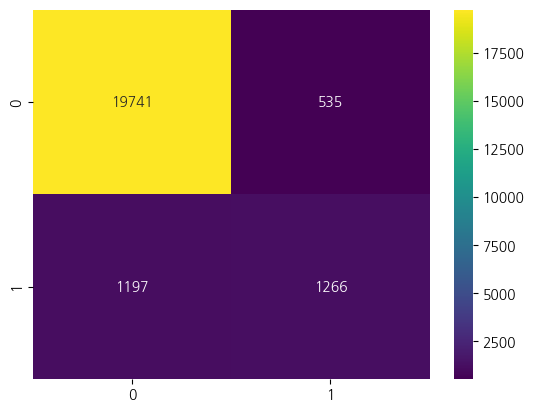

In [47]:
y_valid_predict_etc = cross_val_predict(model_etc, X_train, y_train, cv=10, n_jobs= -1, verbose=2)
cm = confusion_matrix(y_train,y_valid_predict_etc)
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.0f');

In [48]:
f1=f1_score(y_train, y_valid_predict_etc)
f1

0.5938086303939962

In [49]:
sgd_clf.fit(X_train, y_train)
y_predict = sgd_clf.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
submit_csv(y_predict,f1)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


결과 : 굉장히 낮음 0.4730537006

## XGBoostClassifier

In [34]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                             n_estimators=1000, 
                             max_depth=8,
                             random_state=42, 
                             n_jobs=-1, booster='gbtree')
model_xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [35]:
y_valid_predict = cross_val_predict(model_xgb, X_train, y_train, cv=5, n_jobs = -1, verbose = 2)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   27.6s remaining:   41.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.7s finished


array([0, 0, 0, 0, 0])

In [ ]:
f1=f1_score(y_train, y_valid_predict)
f1

In [54]:
model_xgb.fit(X_train, y_train)
y_predict = model_xgb.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
submit_csv(y_predict,f1).shape

(12943, 2)

결과 데이콘 : 0.7475686401

In [56]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                             n_estimators=1000, 
                             max_depth=8,
                             random_state=42, 
                             n_jobs=-1, booster='gbtree')
model_xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [57]:
parameter = {
    'n_estimators' : [100,200,300,500,700,800,1000,1500],
    'max_depth' : [None, 3,4,5,6,7,8,9,10]
}

In [58]:
from sklearn.model_selection import GridSearchCV

xgb_clf = xgb.XGBClassifier(random_state = 42,booster='gbtree',objective='binary:logistic')
xgb_clf = GridSearchCV(xgb_clf, parameter, cv = 3, n_jobs= -1, scoring='f1_macro')
xgb_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 200, 300, 500, 700, 800, 1000,
                                          1500]},
             scoring='f1_macro')

In [68]:
xgb_clf.best_params_

{'max_depth': 7, 'n_estimators': 800}

In [59]:
y_valid_predict = cross_val_predict(xgb_clf.best_estimator_, X_train, y_train, cv=30, n_jobs=-1, verbose=1)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


array([0, 0, 0, 0, 0])

In [60]:
f1=f1_score(y_train, y_valid_predict)
f1

0.6103655714946783

In [66]:
xgb_clf.best_estimator_.fit(X_train, y_train)
y_predict = xgb_clf.best_estimator_.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
submit_csv(y_predict,f1)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,1
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


결과 :0.7479430434